In [3]:
# Curriculum Design

SyntaxError: invalid syntax (<ipython-input-3-b27a274b3ca8>, line 1)

In [5]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sb

from time import sleep

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [8]:
data = pd.read_csv('indeed_skills.csv')
data = data.drop(['Unnamed: 0'], axis=1)
indeed_skills = data.drop(['employer', 'link', 'location', 'position_title', 'salary', 'description'], axis=1)
indeed_skills.head()

,google app engine,amazon comprehend,azure face api,google cloud automl,prophet,cntk,aws batch,shiny,google cloud datastore,jupyter/ipython,...,rapidminer,aws elastic mapreduce,google cloud video intelligence api,microsoft analysis services,dataversity,ibm cloud virtual servers,keras,ggplot2,google cloud sql,google colab
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


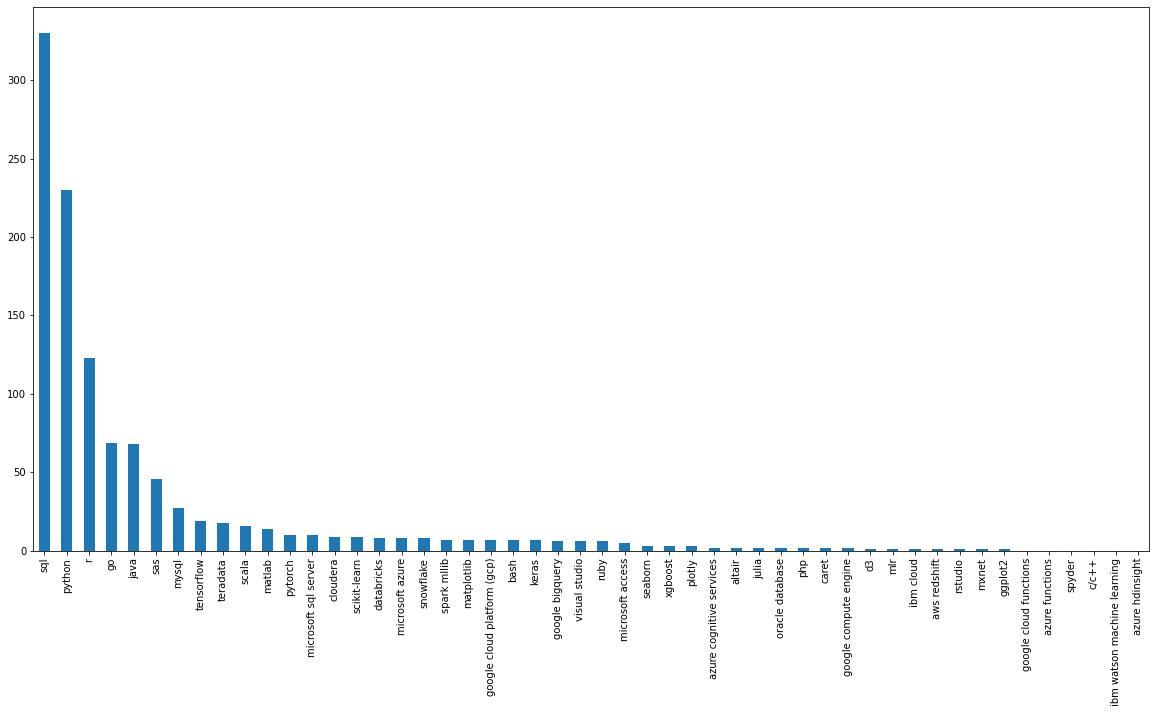

In [9]:
# Visualize the frequency of the skills in indeed job postings
plt.figure(figsize=(20,10))
ax = indeed_skills.sum().sort_values(ascending=False)[:50].plot(kind="bar")
plt.show()

## Clustering of skills

Use hierachircal clustering to cluster the skills identified above. Each cluster could potentially represent closely related skills according to the dataset. Thus, the clusters can be used as topic (or give an idea of  topic) that can be added on the curriculum and elements of the cluster can inform the subtopics. (or something along these lines)

### Kaggle data

In [36]:
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

In [37]:
kaggle_skills = pd.read_csv('kaggle_skills.csv')
kaggle_skills = kaggle_skills.drop(['Unnamed: 0'], axis=1)

In [47]:
# Helper function to run clustering
def run_clustering(df, n_clusters):
    
    df = pd.DataFrame(normalize(df), columns=df.columns)
    df = df.transpose()
    df.index.name = 'words'
    
    model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',
                                    compute_full_tree=True,linkage='ward')
    clusters = model.fit_predict(df)
    df["cluster_name"] = clusters

    df.reset_index(inplace=True)
    cluster_list = len(df["cluster_name"].unique())
    
    #Retrieve the elements of each cluster
    for cluster_number in range(cluster_list):
        print("="*20)
        print("Cluster %d: " % cluster_number)
        df_temp = df[df['cluster_name'] == cluster_number]
        df_temp = df_temp.drop(columns = 'cluster_name')
        print("Cluster size: ", len(df_temp))
        print(','.join(df_temp.words.tolist()))

In [48]:
run_clustering(kaggle_skills, 10)

Cluster 0: 
Cluster size:  12
c,c++,java,javascript,bash,matlab, plotly / plotly express ,bayesian approaches, google cloud platform (gcp) , amazon web services (aws) ,mysql,postgressql
Cluster 1: 
Cluster size:  56
typescript, altair , shiny , d3.js , bokeh , geoplotlib , leaflet / folium ,evolutionary approaches,generative adversarial networks,recurrent neural networks,transformer networks (bert, gpt-2, etc),generative networks (gan, vae, etc),word embeddings/vectors (glove, fasttext, word2vec),encoder-decorder models (seq2seq, vanilla transformers),contextualized embeddings (elmo, cove),transformer language models (gpt-2, bert, xlnet, etc), caret , lightgbm , spark mlib , fast.ai , microsoft azure , ibm cloud , alibaba cloud , salesforce cloud , oracle cloud , sap cloud , vmware cloud , red hat cloud ,google bigquery,aws redshift,databricks,aws elastic mapreduce,teradata,microsoft analysis services,google cloud dataflow,aws athena,aws kinesis,google cloud pub/sub,sas,cloudera,azure 

* From the bar chart earlier, python seems to be the most used programming language and from above, it belongs to its own cluster. We can decide to use python as the primary language for the course

* Cluster 2 looks like python libraries. We can add that to the curriculum

* Cluster 3 seems to be about Neural Networks. We can decide to add an intro to NN

* Cluster 4 & 5 seem to be supervised learning algorithms, so we can add that to the syllabus (with subtopics of linear or logistic regression,decision trees or random forests, xgboost

* Ignore cluster 8, because we decided to go with python

* Cluster 9: keep as NN libraries. Can combine this with cluster 3

### Indeed

In [10]:
# Try for indeed skills

#Remove skills that are not found in indeed job postings
indeed_df = indeed_skills.drop(columns=indeed_skills.columns[indeed_skills.sum()==0])
indeed_df.head()

,r,mysql,spark mllib,php,seaborn,plotly,databricks,xgboost,bash,pytorch,...,go,microsoft access,d3,scala,visual studio,snowflake,java,ibm cloud,keras,ggplot2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
indeed_df['r'].value_counts()

0.0    1146
1.0     123
Name: r, dtype: int64

In [17]:
indeed_df.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfTran = TfidfTransformer()

tfidf_matrix = tfidfTran.fit_transform(indeed_df.values)
tfidf_matrix

<1269x44 sparse matrix of type '<class 'numpy.float64'>'
	with 1110 stored elements in Compressed Sparse Row format>

In [42]:
tfidf=pd.DataFrame(tfidf_matrix.toarray(),columns=indeed_df.columns)

In [43]:
df=tfidf.T
df.dot(df.T)

,r,mysql,spark mllib,php,seaborn,plotly,databricks,xgboost,bash,pytorch,...,go,microsoft access,d3,scala,visual studio,snowflake,java,ibm cloud,keras,ggplot2
r,48.961422,0.836901,0.000000,0.000000,0.101514,0.211373,0.509658,0.350930,0.000000,0.487187,...,1.107149,0.000000,0.000000,3.364630,0.000000,0.000000,1.447156,0.312142,0.091106,0.111922
mysql,0.836901,12.154086,0.000000,0.000000,0.000000,0.000000,0.243057,0.000000,1.679691,0.000000,...,0.000000,0.000000,0.000000,0.567386,0.000000,0.403457,5.613814,0.000000,0.000000,0.000000
spark mllib,0.000000,0.000000,4.943982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.188247,0.000000,0.000000,0.000000
php,0.000000,0.000000,0.000000,1.402970,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.778835,0.000000,0.000000,0.000000
seaborn,0.101514,0.000000,0.000000,0.000000,0.436834,0.000000,0.000000,0.230525,0.000000,0.371469,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.392046,0.227461
plotly,0.211373,0.000000,0.000000,0.000000,0.000000,1.843099,0.000000,0.000000,0.000000,0.000000,...,0.238448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
databricks,0.509658,0.243057,0.000000,0.000000,0.000000,0.000000,3.435053,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.423384,0.000000,0.000000,0.000000,0.000000
xgboost,0.350930,0.000000,0.000000,0.000000,0.230525,0.000000,0.000000,0.943725,0.000000,0.196031,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.206890,0.000000
bash,0.000000,1.679691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.375022,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.176465,0.000000,0.000000,0.000000
pytorch,0.487187,0.000000,0.000000,0.000000,0.371469,0.000000,0.000000,0.196031,0.000000,3.093533,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.337043,0.000000,1.008296,0.193425


In [54]:
df=indeed_df.T
cos_similarity_matrix=df.dot(df.T)

Text(0.5, 1.0, 'Hierarchical clustering of Indeed skills ')

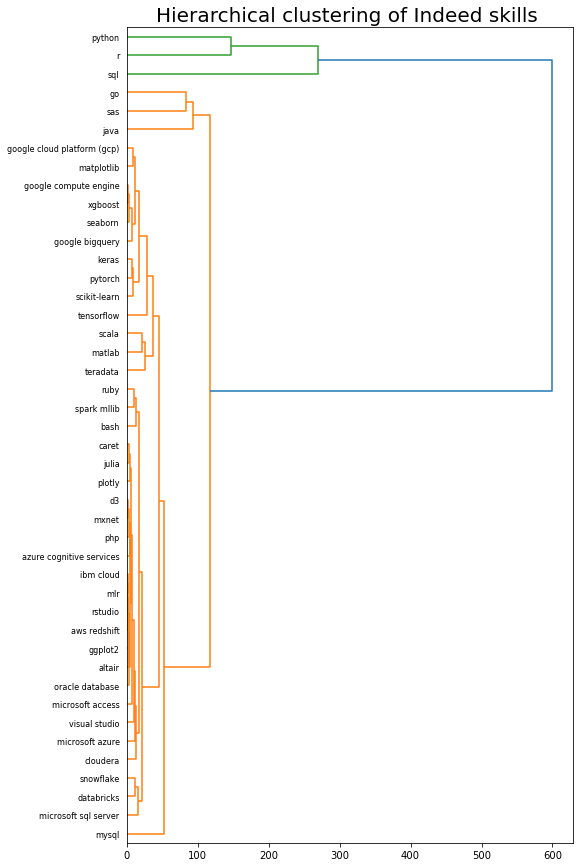

In [78]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances

# Method 'ward' requires the distance metric to be Euclidean
Z = linkage(cos_similarity_matrix, method='ward', metric='euclidean')
fig = plt.figure(figsize=(8, 15))

# First define the leaf label function.
n=50
labels=cos_similarity_matrix.columns.values.tolist()
def llf(id):
    if id < n:
        return labels[id]
    else:
        return '[%d %d %1.2f]' % (id, count, R[n-id,3])
# The text for the leaf nodes is going to be big so force
# a rotation of 90 degrees.
dendrogram(Z, orientation='right', leaf_label_func=llf)

plt.title("Hierarchical clustering of Indeed skills ",fontsize=20)